### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,...,196}

In [1]:
import numpy as np

CLASS0 = "class 0"
CLASS1 = "class 1"
EPSILON = 1e-8

def load_data(file_path):
	"""read records from csv file"""
	row_data = np.genfromtxt(file_path, dtype=None, delimiter=',', encoding='utf-8')[1:]
	X = np.array(row_data[:, :-1], dtype=float)
	Y_row_str_data = row_data[:, row_data.shape[1] - 1]
	y = np.array([1 if x == "Abnormal" else 0 for x in Y_row_str_data])
	# print(X)
	# print(y)
	return X, y

def train_test_by_class_index(X, y, split_info_dict):
	"""According to the dict, split row data into X_train, X_test, y_train, y_test"""
	assert X.shape[0] == y.shape[0], \
		"the size of X must be equal to the size of y"
	assert split_info_dict is not None, \
		"Please initialize a dict with {CLASS0: int, CLASS1: int}"
	
	normal_indexes = (y == 0)
	abnormal_indexes = (y == 1)
	normal_limit = split_info_dict[CLASS0]
	abnormal_limit = split_info_dict[CLASS1]

	'''first 70 rows of class 0'''
	X_data_normal = X[normal_indexes, :][:normal_limit]
	y_data_normal = y[normal_indexes][:normal_limit]

	'''the rest of data in class 0'''
	X_rest_data_normal = X[normal_indexes, :][normal_limit:]
	y_rest_data_normal = y[normal_indexes][normal_limit:]

	'''first 140 rows of class 1'''
	X_data_abnormal = X[abnormal_indexes, :][:abnormal_limit]
	y_data_abnormal = y[abnormal_indexes][:abnormal_limit]
	'''the rest of data in class 1'''
	X_rest_data_abnormal = X[abnormal_indexes, :][abnormal_limit:]
	y_rest_data_abnormal = y[abnormal_indexes][abnormal_limit:]

	'''combine them into one array'''
	X_train = np.concatenate((X_data_normal, X_data_abnormal), axis=0)
	X_test = np.concatenate((X_rest_data_normal, X_rest_data_abnormal), axis=0)

	y_train = np.concatenate((y_data_normal, y_data_abnormal), axis=0)
	y_test = np.concatenate((y_rest_data_normal, y_rest_data_abnormal), axis=0)

	return X_train, X_test, y_train, y_test

In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

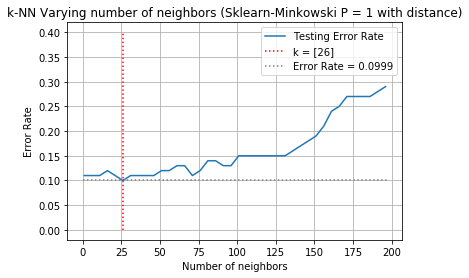

In [3]:
# Test Manhattan Distance when p = 1
X_row_data, Y_row_data = load_data('./assets/data.csv')

split_info_dict = {CLASS0: 70, CLASS1: 140}

X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, split_info_dict)

alternative_k = np.arange(1, 197, 5)
train_accuracy = np.empty(len(alternative_k))
test_accuracy = np.empty(len(alternative_k))

for index, k in enumerate(alternative_k):
    # KNeighborsClassifier based on Minkowski Distance
    knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1, weights='distance')	# Manhattan Distance
    # knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2, weights='distance')  # Euclidean Distance
    # knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=float('inf'), weights='distance')  # Chebyshev Distance

    knn_clf.fit(X_train, y_train)

    y_predict = knn_clf.predict(X_test)

    train_accuracy[index] = knn_clf.score(X_train, y_train)

    test_accuracy[index] = knn_clf.score(X_test, y_test)

best_accuracy_ = np.max(test_accuracy)
best_k_ = (np.reshape(np.argwhere(test_accuracy == best_accuracy_), (1, -1))[0]) * 5 + 1
# print(best_accuracy)
# print(best_k)
plt.title('k-NN Varying number of neighbors (Sklearn-Minkowski P = 1 with distance)')
plt.plot(alternative_k, 1 - test_accuracy, label='Testing Error Rate')
plt.vlines(best_k_, 0, 0.4, colors='red', label='k = ' + str(best_k_), linestyles='dotted')
plt.hlines(1 - best_accuracy_, 0, 197, colors='gray', label='Error Rate = ' + str(1 - best_accuracy_)[:6], linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.show()

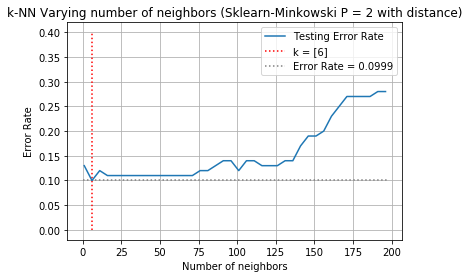

In [4]:
# Test Euclidean Distance when p = 2
X_row_data, Y_row_data = load_data('./assets/data.csv')

split_info_dict = {CLASS0: 70, CLASS1: 140}

X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, split_info_dict)

alternative_k = np.arange(1, 197, 5)
train_accuracy = np.empty(len(alternative_k))
test_accuracy = np.empty(len(alternative_k))

for index, k in enumerate(alternative_k):
    # KNeighborsClassifier based on Minkowski Distance
    # knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1, weights='distance')	# Manhattan Distance
    knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2, weights='distance')  # Euclidean Distance
    # knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=float('inf'), weights='distance')  # Chebyshev Distance

    knn_clf.fit(X_train, y_train)

    y_predict = knn_clf.predict(X_test)

    train_accuracy[index] = knn_clf.score(X_train, y_train)

    test_accuracy[index] = knn_clf.score(X_test, y_test)

best_accuracy_ = np.max(test_accuracy)
best_k_ = (np.reshape(np.argwhere(test_accuracy == best_accuracy_), (1, -1))[0]) * 5 + 1
# print(best_accuracy)
# print(best_k)
plt.title('k-NN Varying number of neighbors (Sklearn-Minkowski P = 2 with distance)')
plt.plot(alternative_k, 1 - test_accuracy, label='Testing Error Rate')
plt.vlines(best_k_, 0, 0.4, colors='red', label='k = ' + str(best_k_), linestyles='dotted')
plt.hlines(1 - best_accuracy_, 0, 197, colors='gray', label='Error Rate = ' + str(1 - best_accuracy_)[:6], linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.show()

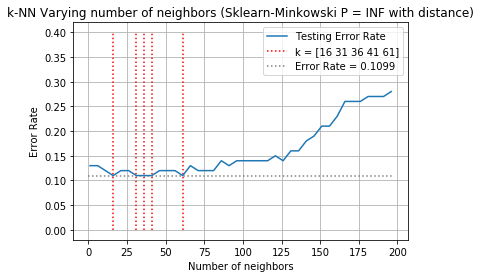

In [5]:
# Test Manhattan Distance when p = 1
X_row_data, Y_row_data = load_data('./assets/data.csv')

split_info_dict = {CLASS0: 70, CLASS1: 140}

X_train, X_test, y_train, y_test = train_test_by_class_index(X_row_data, Y_row_data, split_info_dict)

alternative_k = np.arange(1, 197, 5)
train_accuracy = np.empty(len(alternative_k))
test_accuracy = np.empty(len(alternative_k))

for index, k in enumerate(alternative_k):
    # KNeighborsClassifier based on Minkowski Distance
    # knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1, weights='distance')	# Manhattan Distance
    # knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2, weights='distance')  # Euclidean Distance
    knn_clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=float('inf'), weights='distance')  # Chebyshev Distance

    knn_clf.fit(X_train, y_train)

    y_predict = knn_clf.predict(X_test)

    train_accuracy[index] = knn_clf.score(X_train, y_train)

    test_accuracy[index] = knn_clf.score(X_test, y_test)

best_accuracy_ = np.max(test_accuracy)
best_k_ = (np.reshape(np.argwhere(test_accuracy == best_accuracy_), (1, -1))[0]) * 5 + 1
# print(best_accuracy)
# print(best_k)
plt.title('k-NN Varying number of neighbors (Sklearn-Minkowski P = INF with distance)')
plt.plot(alternative_k, 1 - test_accuracy, label='Testing Error Rate')
plt.vlines(best_k_, 0, 0.4, colors='red', label='k = ' + str(best_k_), linestyles='dotted')
plt.hlines(1 - best_accuracy_, 0, 197, colors='gray', label='Error Rate = ' + str(1 - best_accuracy_)[:6], linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.show()